In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('data/train/train.csv')
print("data shape : ",df.shape)

data shape :  (550068, 12)


In [5]:
# check duplication
sum(df.duplicated())

0

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [11]:
for col in df.columns:
    print(col + ':', df[col].unique())

User_ID: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]
Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase: [ 8370 15200  1422 ...   135   123   613]


In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
total = df.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


In [15]:
#fill median for Product_Category_2
df.Product_Category_2.fillna(df.Product_Category_2.median(),inplace=True)
#delete Product_Category_3 because missing value >60% 
df=df.drop('Product_Category_3',axis=1)

In [ ]:
#check missing value
df.isnull().sum().max()

# Explore data analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


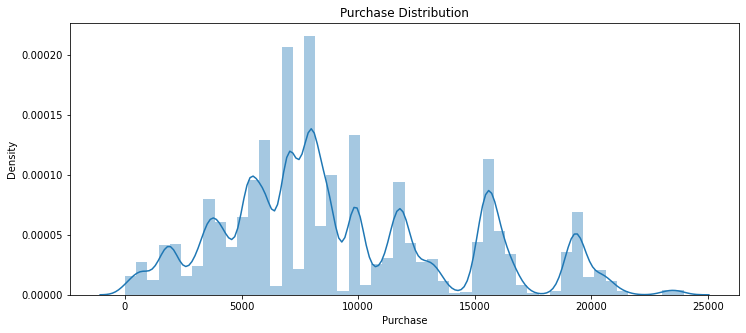

In [18]:
plt.figure(figsize=(12,5))
sns.distplot(df["Purchase"])
plt.title("Purchase Distribution")
plt.show()

0 frequency near 15000 and mid of 15000-20000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


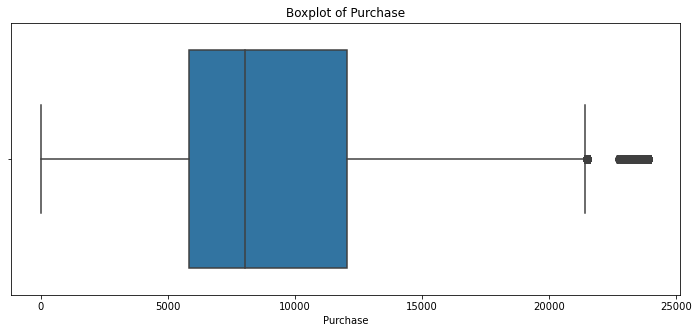

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

### Male or female who bought more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


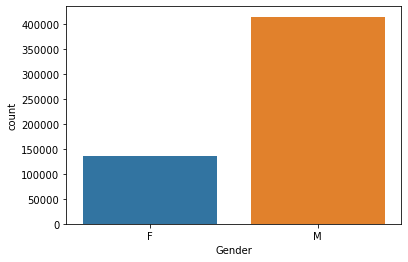

In [21]:
sns.countplot(df['Gender'])
plt.show()

* Male hase more time bought  more than female

In [23]:
df.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

* The mean purchase of male is more than female, but the difference is not very obvious.

## How about different of occupation?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


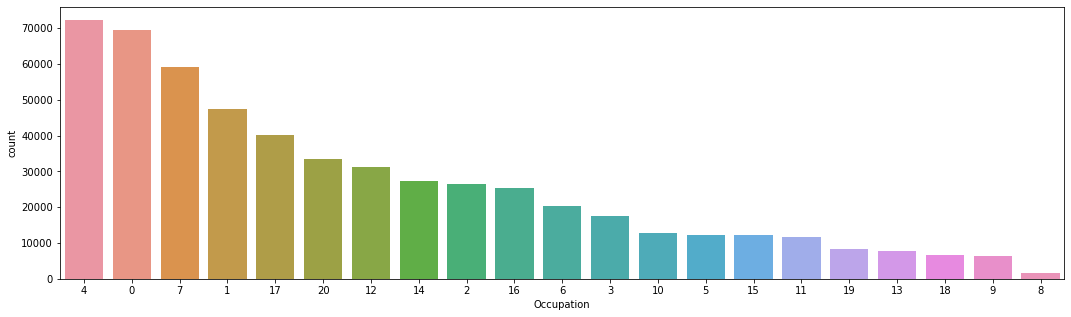

In [25]:
plt.figure(figsize=(18,5))
sns.countplot(df['Occupation'], order = df['Occupation'].value_counts().index)
plt.show()

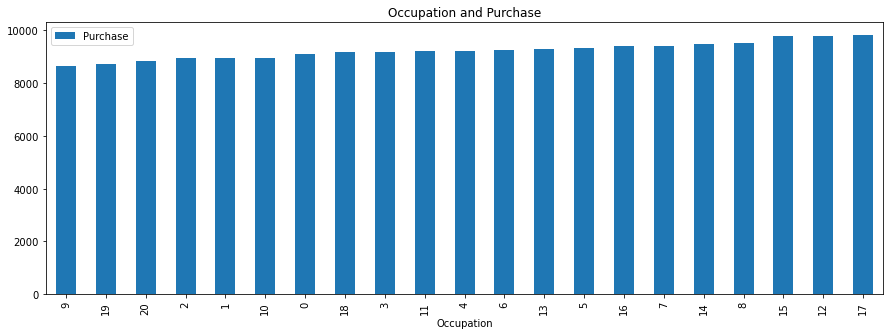

In [26]:
df1 = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"]).sort_values('Purchase')
df1.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase")
plt.show()

* The mean of each occupation is different, but the difference is not very obvious.
* The much of bought time in each occupation is different.

# How about city?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


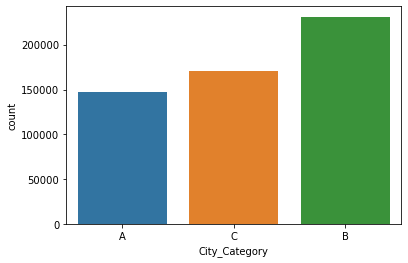

In [28]:
sns.countplot(df['City_Category'])
plt.show()

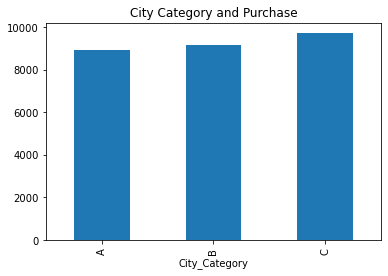

In [29]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase")
plt.show()

* The people in city C has mean of money buy more than people in city A, B. The city B has the most purchases.

# Stay_In_Current_City_Years 

* Do who live more time in current city has bought more?

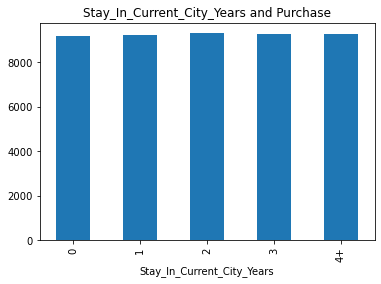

In [31]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase")
plt.show()

* No, because mean of purchase is not different between number years of stay in city

# Do people who stay in the city longer buy more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


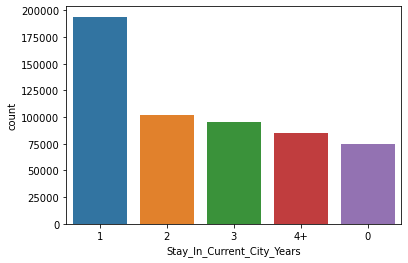

In [32]:
sns.countplot(df['Stay_In_Current_City_Years'], order = df['Stay_In_Current_City_Years'].value_counts().index)
plt.show()

* No. Because people who stay in the city longer have fewer purchases than others.
* We have to care about people who are within a year in the city because they have more purchases than others.

## Marital_Status

* Do married people spend more on average?

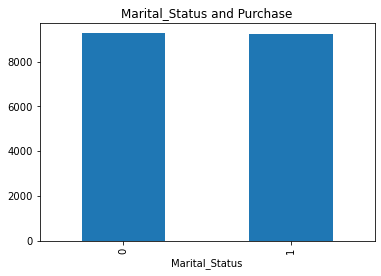

In [36]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase")
plt.show()

* No, there is no difference in the average amount of money spent between married and unmarried people

## Do married people have more shopping?

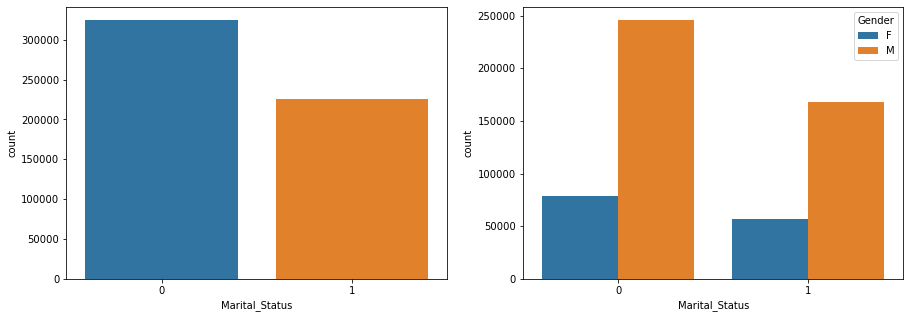

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(x='Marital_Status', data = df, ax=axs[0])
sns.countplot(x='Marital_Status', hue = 'Gender', data = df, ax=axs[1])
plt.show()

* No, unmarried people buy more, both in men and women.
* We should take care of singles in our next marketing campaign.

## Which age buys more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


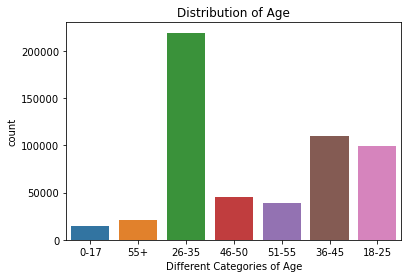

In [37]:
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

* 26-35 years old shop the most in age groups

## Is the average amount of 26-35 year olds the highest?

<AxesSubplot:xlabel='Age'>

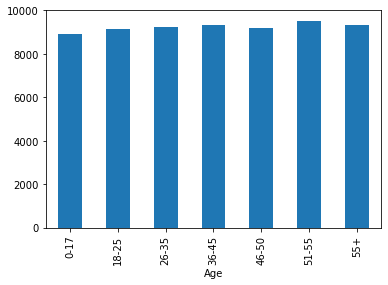

In [38]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')

* There is no difference between the average purchase

# Product_Category_1

Text(0.5, 1.0, 'Distribution of  Product_Category_1')

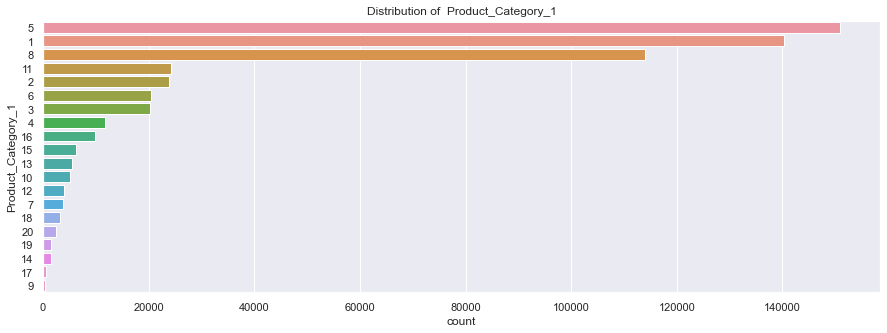

In [43]:
plt.figure(figsize=(15,5))
ax = sns.countplot(y="Product_Category_1", data=df, order = df['Product_Category_1'].value_counts().index)
plt.title('Distribution of  Product_Category_1')

* Product 5,1,8 has much of purchase

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

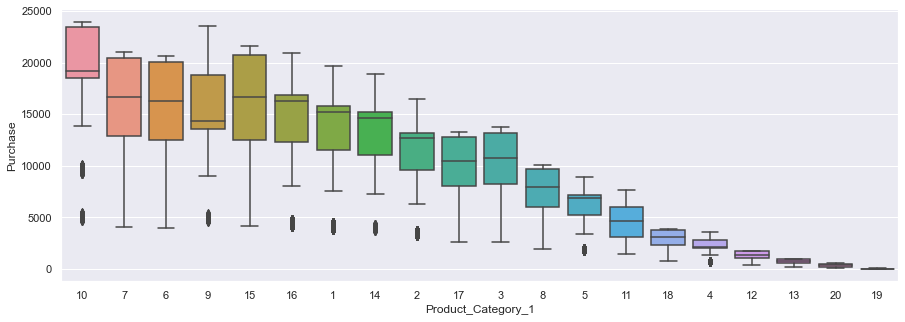

In [42]:
order = df.groupby(by = ['Product_Category_1'] )['Purchase'].mean().sort_values().index[::-1]
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(df['Product_Category_1'],df['Purchase'],order=order)

* Product 5,8 has much bought count but the price is not high.
* The mean of Product_Category_1 is different. The product 10, 7, 6 has highest of purchase median

## Product_Category_2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

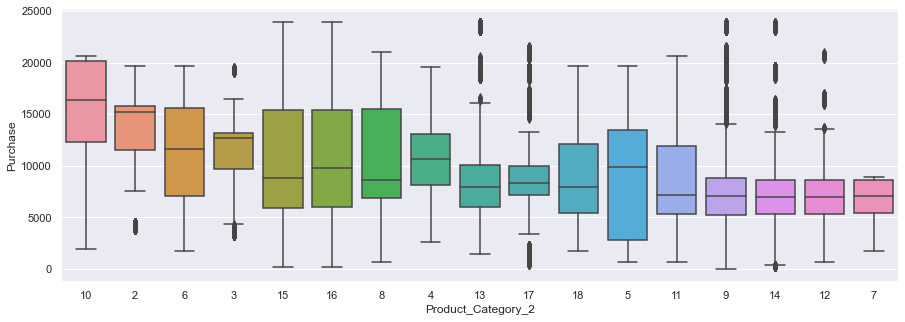

In [45]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

order = df.groupby(by = ['Product_Category_2'] )['Purchase'].mean().sort_values().index[::-1]
sns.boxplot(df['Product_Category_2'],df['Purchase'],order=order)

* Product_Category_2 is not different in price

# Correlation

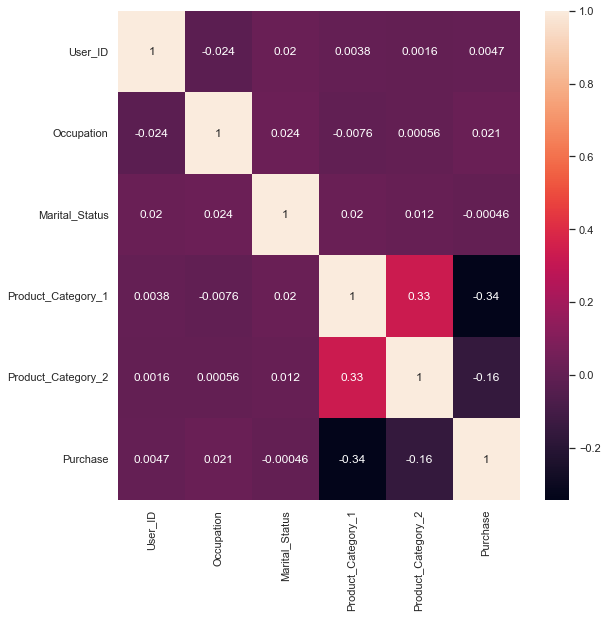

In [46]:
#df = pd.read_csv('data/train/train.csv')
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

Looking at the graph, we see that Purchase is highly correlated with the feature 'Product_Category_1' and 'Product_Category_2'

#  Data preprocessing

In [47]:
df['Age'] = df['Age'].apply(lambda x:str(x).replace('55+', '55'))
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [48]:
# Delete unuse column
df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [49]:
# Encode object features

from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Age'] = LabelEncoder().fit_transform(df['Age'])
df['City_Category'] = LabelEncoder().fit_transform(df['City_Category'])

In [50]:
from sklearn.model_selection import train_test_split
# Chia data thành biến X, Y
X = df.drop("Purchase", axis = 1)
Y = df["Purchase"]
x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size=0.3)

#  Modeling

In [51]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [52]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 10965.26371489582
                            Coefficient
Gender                       504.349401
Age                          121.627916
Occupation                     7.515733
City_Category                343.884944
Stay_In_Current_City_Years     7.713232
Marital_Status               -48.304747
Product_Category_1          -416.428459
Product_Category_2           -57.368666


In [53]:
predictions = lm.predict(x_test)

## Formula

#### MAE:

\begin{align}
       \text{MAE = }\frac{1}n \sum_{i=1}^{n}|Predicted_i-Actual_i|
    \end{align}

#### RMSE:
 \begin{align}
       \text{RMSE = }\sqrt{\frac{1}n \sum_{i=1}^{n}(Predicted_i-Actual_i)^2}
    \end{align}

In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE', (metrics.mean_squared_error(y_test, predictions, squared=False)))

MAE: 3590.491945782574
RMSE 4690.037878114225
